# 목차

1. 라이브러리 불러오기
2. 데이터 준비  
      
    2.1 데이터 불러오기  
    2.2 데이터 저장하기
    2.3 데이터 이해하기 
    2.4 Train, Test 데이터셋 분리하기  
    
    
3. 학습 모델(선형회귀) 설계  

    3.1 W, b 초기값 설정
    3.2 예측 모델 설계
    3.3 손실함수 정의  
    3.4 손실함수 미분(기울기)   
    3.5 경사하강법  
    
    
4. 모델 학습  

    4.1 경사하강법 - Learing Rate 1.0
    4.2 경사하강법 - Learing Rate 0.001


5. 모델 예측

6. 성능 평가(Test 데이터셋으로)

7. 시각화
8. 회고



# 1. 라이브러리 불러오기

In [67]:
from sklearn.datasets import load_diabetes                # sklearn datasets으로 load_diabetes 데이터셋 로드
from sklearn.model_selection import train_test_split      # 데이터셋을 train, test로 분할 라이브러리 

import pandas as pd                                       # pandas 라이브러리 불러오기
import numpy as np                                        # numpy 라이브러리 불러오기
import matplotlib.pyplot as plt                           # matplotlib.pyplot 라이브러리 불러오기

# 화면에 그래프를 바로 볼 수 있게 해줌
%matplotlib inline
# 더높은 해상도로 출력
%config InlineBackend.figure_format = 'retina'

# 2. 데이터 준비

In [68]:
# 2.1 데이터 가져오기/불러오기
diabetes = load_diabetes(as_frame=True)            # diabetes 객체 생성
                                                   # 인자 as_frame=True에 의해 자료구조를 데이터프레임으로 설정, not ndarray


# 2.2 데이터 내용 저장하기
df_X = diabetes.data                               # data을 데이터프레임으로 저장
df_y = diabetes.target                             # target을 데이터프레임으로 저장

diabetes_data = df_X.to_numpy()                    # DataFrame을 numpy array로
diabetes_target = df_y.to_numpy()                  # DataFrame을 numpy array로


# 2.3 데이터 이해하기

# diabetes
diabetes.keys()                                     # diabetes 객체 매서드 이름을  key로 불러오기


# data
diabetes_data                                       # 데이터 값(문제지)
                                                    # if as_frame=True, a pandas DataFrame 
diabetes_data.shape                                 # 데이터 442개, 속성 10개
type(diabetes_data)                                 # ndarray 2차원
                                                    # if as_frame=True, a pandas DataFrame
diabetes_data[0]                                    # 첫번째 당뇨 환자 데이터
diabetes.data_filename                              # data 파일 경로


# target/class/label
diabetes_target                                     # 타겟/클래스/라벨(정답지), 11번째 열에 있는 데이터임
                                                    # baseline 이후 1년 동안 질병 진행의 정략적 측정치
diabetes_target.shape                               # 타겟 데이터 442개
type(diabetes_target)                               # ndarray 1차원
diabetes_target[0]                                  # 첫번쨰 당뇨 환자 
diabetes.target_filename                            # 타켓 파일 경로


# feature
diabetes.feature_names                              # 속성/특징 이름들
'''   - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level
'''


# frame
diabetes.frame                                      # (442, 11) 크기의 DataFrame
                                                    # 단, load_diabetes()의 인자로 as_frame=True일 때만 접근 가능

# module
diabetes.data_module                                # 어떤 모듈에 속한지 확인


# Description
print(diabetes.DESCR)                               # diabetes 데이터셋 설명



# 2.4 Train, Test으로 데이터셋 분리
''' 전체 데이터를 모두 학습시키는데 사용하면 테스트용 데이터가 없으므로 데이터의 일부는 테스트용으로 떼어놓는다
    diabetes_data 데이터셋을 X_train, X_test(20%) 떼어두고, diabetes_target 데이터셋을 y_train, y_test(20%) 떼어 놓는다
    
    테스트 사이즈 0.2라는 의미는 20%를 떼어 놓겠다는 의미
    
    random_state는 데이터 분할하기 전에 임의로 돌려서 분할한다는 의미이며 숫자는 램덤 시드값.
    train_test_split 인자중 shuffle=True이므로 랜덤 씨드값만 부여하면 됨
    '''
X_train, X_test, y_train, y_test = train_test_split(diabetes_data, diabetes_target, test_size=0.2, random_state=2022)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

# 3. 학습 모델(선형회귀) 설계

In [3]:
# 3.1 W, b 파라미터 초기값 설정
N = len(diabetes.feature_names)                      # 속성들 개수
W = np.random.rand(N)                                # 파라미터 W 초기값 특징 개수만큼 난수 생성
b = np.random.rand()                                 # 파라미터 b 초기값 난수 생성


# 3.2 예측 모델 설정
def model(X, W, b):
    predictions = 0
    for i in range(N): 
        predictions += X[:, i] * W[i]                # 예측값 : X데이터의 각 컬럼과 가중치 W와 곱하고 더하기
    
    predictions += b                                 # 예측값 : 위의 예측값에 bias 값 더하기
    return predictions


# 3.3 손실함수 정의
def Loss_MSE(X, W, b, y):                            # MSE형 손실함수
    y_pred = model(X, W, b)                          # MSE를 계산하기 위해 모델의 예측값이 필요함
    MSE = ((y_pred - y) ** 2).mean()                 # 예측값과 실제값 차이의 제곱의 평균 -> Loss값

    return MSE


# 3.4 손실함수 미분(기울기) 정의
def gradient(X, W, b, y):
    y_pred = model(X, W, b)                          # 예측 모델의 예측값 확인
    
    # W의 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)               # 손실함수의 W에 대한 편미분 공식
                                                     # 최적의 W를 찾기 위한 W 기울기 도출
                                                     # inner product!
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()                     # 손실함수의 b에 대한 편미분 공식
                                                     # 최적의 b를 찾기 위한 b 기울기 도출
    
    return dW, db


# 3.5 경사하강법 정의
def gradient_descent(X, W, b, y, Learning_rate=0.01): # 경사하강법으로 최적의 파라미터 W, b 찾기(학습 하기)
    losses = []
    for i in range(10000):
        dW, db = gradient(X, W, b, y)                 # W, b의 해당 위치의 기울기 구하기

        W -= Learning_rate * dW                       # 경사하강법으로 최적의 W구하기
        b -= Learning_rate * db                       # 경사하강법으로 최적의 b구하기
                                                      # 여기까지가 모델 학습 코드

        MSE = Loss_MSE(X, W, b, y)                    # 손실(Loss, MSE) 측정
        losses.append(MSE)                            # 손실리스트에 추가하기

        if i % 200 == 0:
            print(f'Iteration {i} : Loss(MSE) : {MSE:0.3f}')
    
    # 손실(Loss)가 발산하는 것을 볼 수 있다
    plt.plot(losses, c='r')                           # 손실 값들이 줄어드는지 확인하기 위해 그래프 그리기
    plt.show()
    
    return W, b, losses[-1]
 

# 4. 모델 학습

## 4.1 경사하강법 - Learning Rate 1.0

Iteration 0 : Loss(MSE) : 26922.548
Iteration 200 : Loss(MSE) : 37450.326
Iteration 400 : Loss(MSE) : 55159.560
Iteration 600 : Loss(MSE) : 81940.897
Iteration 800 : Loss(MSE) : 122440.820
Iteration 1000 : Loss(MSE) : 183685.982
Iteration 1200 : Loss(MSE) : 276302.307
Iteration 1400 : Loss(MSE) : 416358.572
Iteration 1600 : Loss(MSE) : 628154.308
Iteration 1800 : Loss(MSE) : 948435.730
Iteration 2000 : Loss(MSE) : 1432771.148
Iteration 2200 : Loss(MSE) : 2165191.973
Iteration 2400 : Loss(MSE) : 3272772.039
Iteration 2600 : Loss(MSE) : 4947674.701
Iteration 2800 : Loss(MSE) : 7480492.871
Iteration 3000 : Loss(MSE) : 11310666.419
Iteration 3200 : Loss(MSE) : 17102724.282
Iteration 3400 : Loss(MSE) : 25861579.164
Iteration 3600 : Loss(MSE) : 39106878.269
Iteration 3800 : Loss(MSE) : 59136659.645
Iteration 4000 : Loss(MSE) : 89426058.077
Iteration 4200 : Loss(MSE) : 135230235.374
Iteration 4400 : Loss(MSE) : 204496142.473
Iteration 4600 : Loss(MSE) : 309241302.614
Iteration 4800 : Loss(MSE

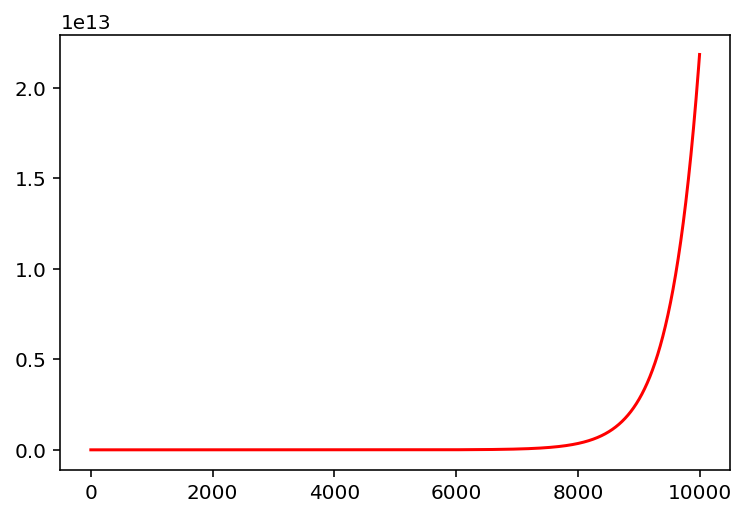

In [4]:
# 모델 학습: 학습률 1 경사하강법
W, b, loss = gradient_descent(X_train, W, b, y_train, Learning_rate=1)

학습률 1인 경우 발산함
- W' = W - LearningRate * Gradient 에서 기울기 값을 구하고 1을 곱하면 기울기 값 그대로 임
- 발산했다는 것은 기울기 값을 빼는데 포뮬선의 최적의(최저점) W을 넘어서도록 W값을 조정하고 있음을 나타내고 있다

따라서 학습률 1로는 제대로된 학습을 할 수 없다


In [5]:
# 마지막 Loss 값
loss

21826557476875.965

In [6]:
# 학습률 1일 때 파라미터 값들
W, b

(array([ 243118.59994576, -206698.40397845,  -42838.54828107,
         336951.77618503,  302089.86122168,  109522.51738015,
         120859.23469874,  155874.59044163,  277347.60049163,
         231631.79630238]),
 -4669044.788746435)

## 4.2 경사하강법 - Learning Rate 0.001 

Iteration 0 : Loss(MSE) : 2870.798
Iteration 200 : Loss(MSE) : 2870.798
Iteration 400 : Loss(MSE) : 2870.798
Iteration 600 : Loss(MSE) : 2870.798
Iteration 800 : Loss(MSE) : 2870.798
Iteration 1000 : Loss(MSE) : 2870.798
Iteration 1200 : Loss(MSE) : 2870.798
Iteration 1400 : Loss(MSE) : 2870.798
Iteration 1600 : Loss(MSE) : 2870.798
Iteration 1800 : Loss(MSE) : 2870.798
Iteration 2000 : Loss(MSE) : 2870.798
Iteration 2200 : Loss(MSE) : 2870.798
Iteration 2400 : Loss(MSE) : 2870.798
Iteration 2600 : Loss(MSE) : 2870.798
Iteration 2800 : Loss(MSE) : 2870.798
Iteration 3000 : Loss(MSE) : 2870.798
Iteration 3200 : Loss(MSE) : 2870.798
Iteration 3400 : Loss(MSE) : 2870.798
Iteration 3600 : Loss(MSE) : 2870.798
Iteration 3800 : Loss(MSE) : 2870.798
Iteration 4000 : Loss(MSE) : 2870.798
Iteration 4200 : Loss(MSE) : 2870.798
Iteration 4400 : Loss(MSE) : 2870.798
Iteration 4600 : Loss(MSE) : 2870.798
Iteration 4800 : Loss(MSE) : 2870.798
Iteration 5000 : Loss(MSE) : 2870.798
Iteration 5200 : Lo

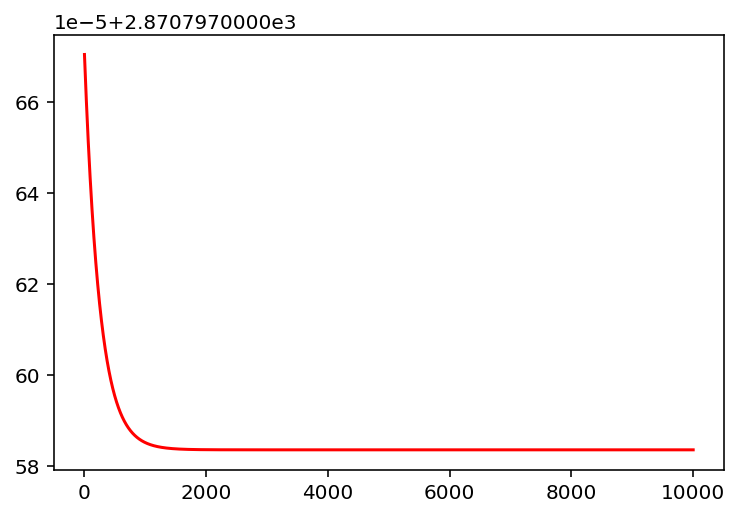

In [69]:
# 모델 학습: 학습률 0.01 경사하강법
W, b, loss = gradient_descent(X_train, W, b, y_train, Learning_rate=0.001)

학습률 0.01인 경우 손실값 약 **2870**에서 수렴한다

In [70]:
# 마지막 Loss 값
loss

2870.7975835587304

In [71]:
# 학습률 0.001일 때 파라미터 값들
W, b

(array([   4.8216429 , -235.07446339,  517.22445595,  368.79039855,
        -465.11898979,  183.20648151,  -55.0937232 ,   83.81707899,
         644.94670733,   81.97954994]),
 152.99098399541256)

# 5. 모델 예측

In [72]:
# 학습으로 도출된 최적의 W, b에 대해서 새로운 데이터(Test dataset)로 예측하기
y_pred = model(X_test, W, b)
y_pred

array([ 72.06828915,  57.44229624, 220.44719746, 145.12681804,
       168.26707768, 189.33255368, 175.76650763, 120.15602616,
       274.81395373, 128.66322103,  92.37383886, 211.49108342,
        72.03248333, 184.89866299, 116.46754988, 272.62801749,
       132.95723051, 199.6688382 , 167.37661797, 107.74082223,
       106.28201737,  89.30645147, 185.34964392, 107.42171012,
       300.61500177, 164.26756855, 217.91383245,  96.11825108,
       145.8441537 , 157.13629347,  54.48183128, 233.86778744,
       239.74577853, 168.76087476, 163.10245071,  79.50947278,
        81.60979345, 250.77375192, 117.82518559, 168.49079802,
       166.24785729, 143.04459078,  90.70616668,  73.35177447,
       266.29682559,  65.83886759, 160.55864543, 113.91892299,
       118.95028244, 214.36480857, 100.33102905, 288.72702568,
       135.12842542, 155.35021349, 215.38901049, 256.5878002 ,
       215.6012409 , 162.14020438, 134.65176973, 116.8800844 ,
       164.64298924, 199.14137898, 160.2737848 ,  57.83

# 6. 성능 평가

In [73]:
# 테스트 데이터로 얻어진 예측값의 손실(Loss)확인
MSE = Loss_MSE(X_test, W, b, y_test)
MSE

2906.9360831543936

Training에서 Loss(MSE)값이 **2870**에서 수렴했는데, **테스트 데이터로도 2907**로 거의 정확하게 맞고 있다

# 7. 시각화

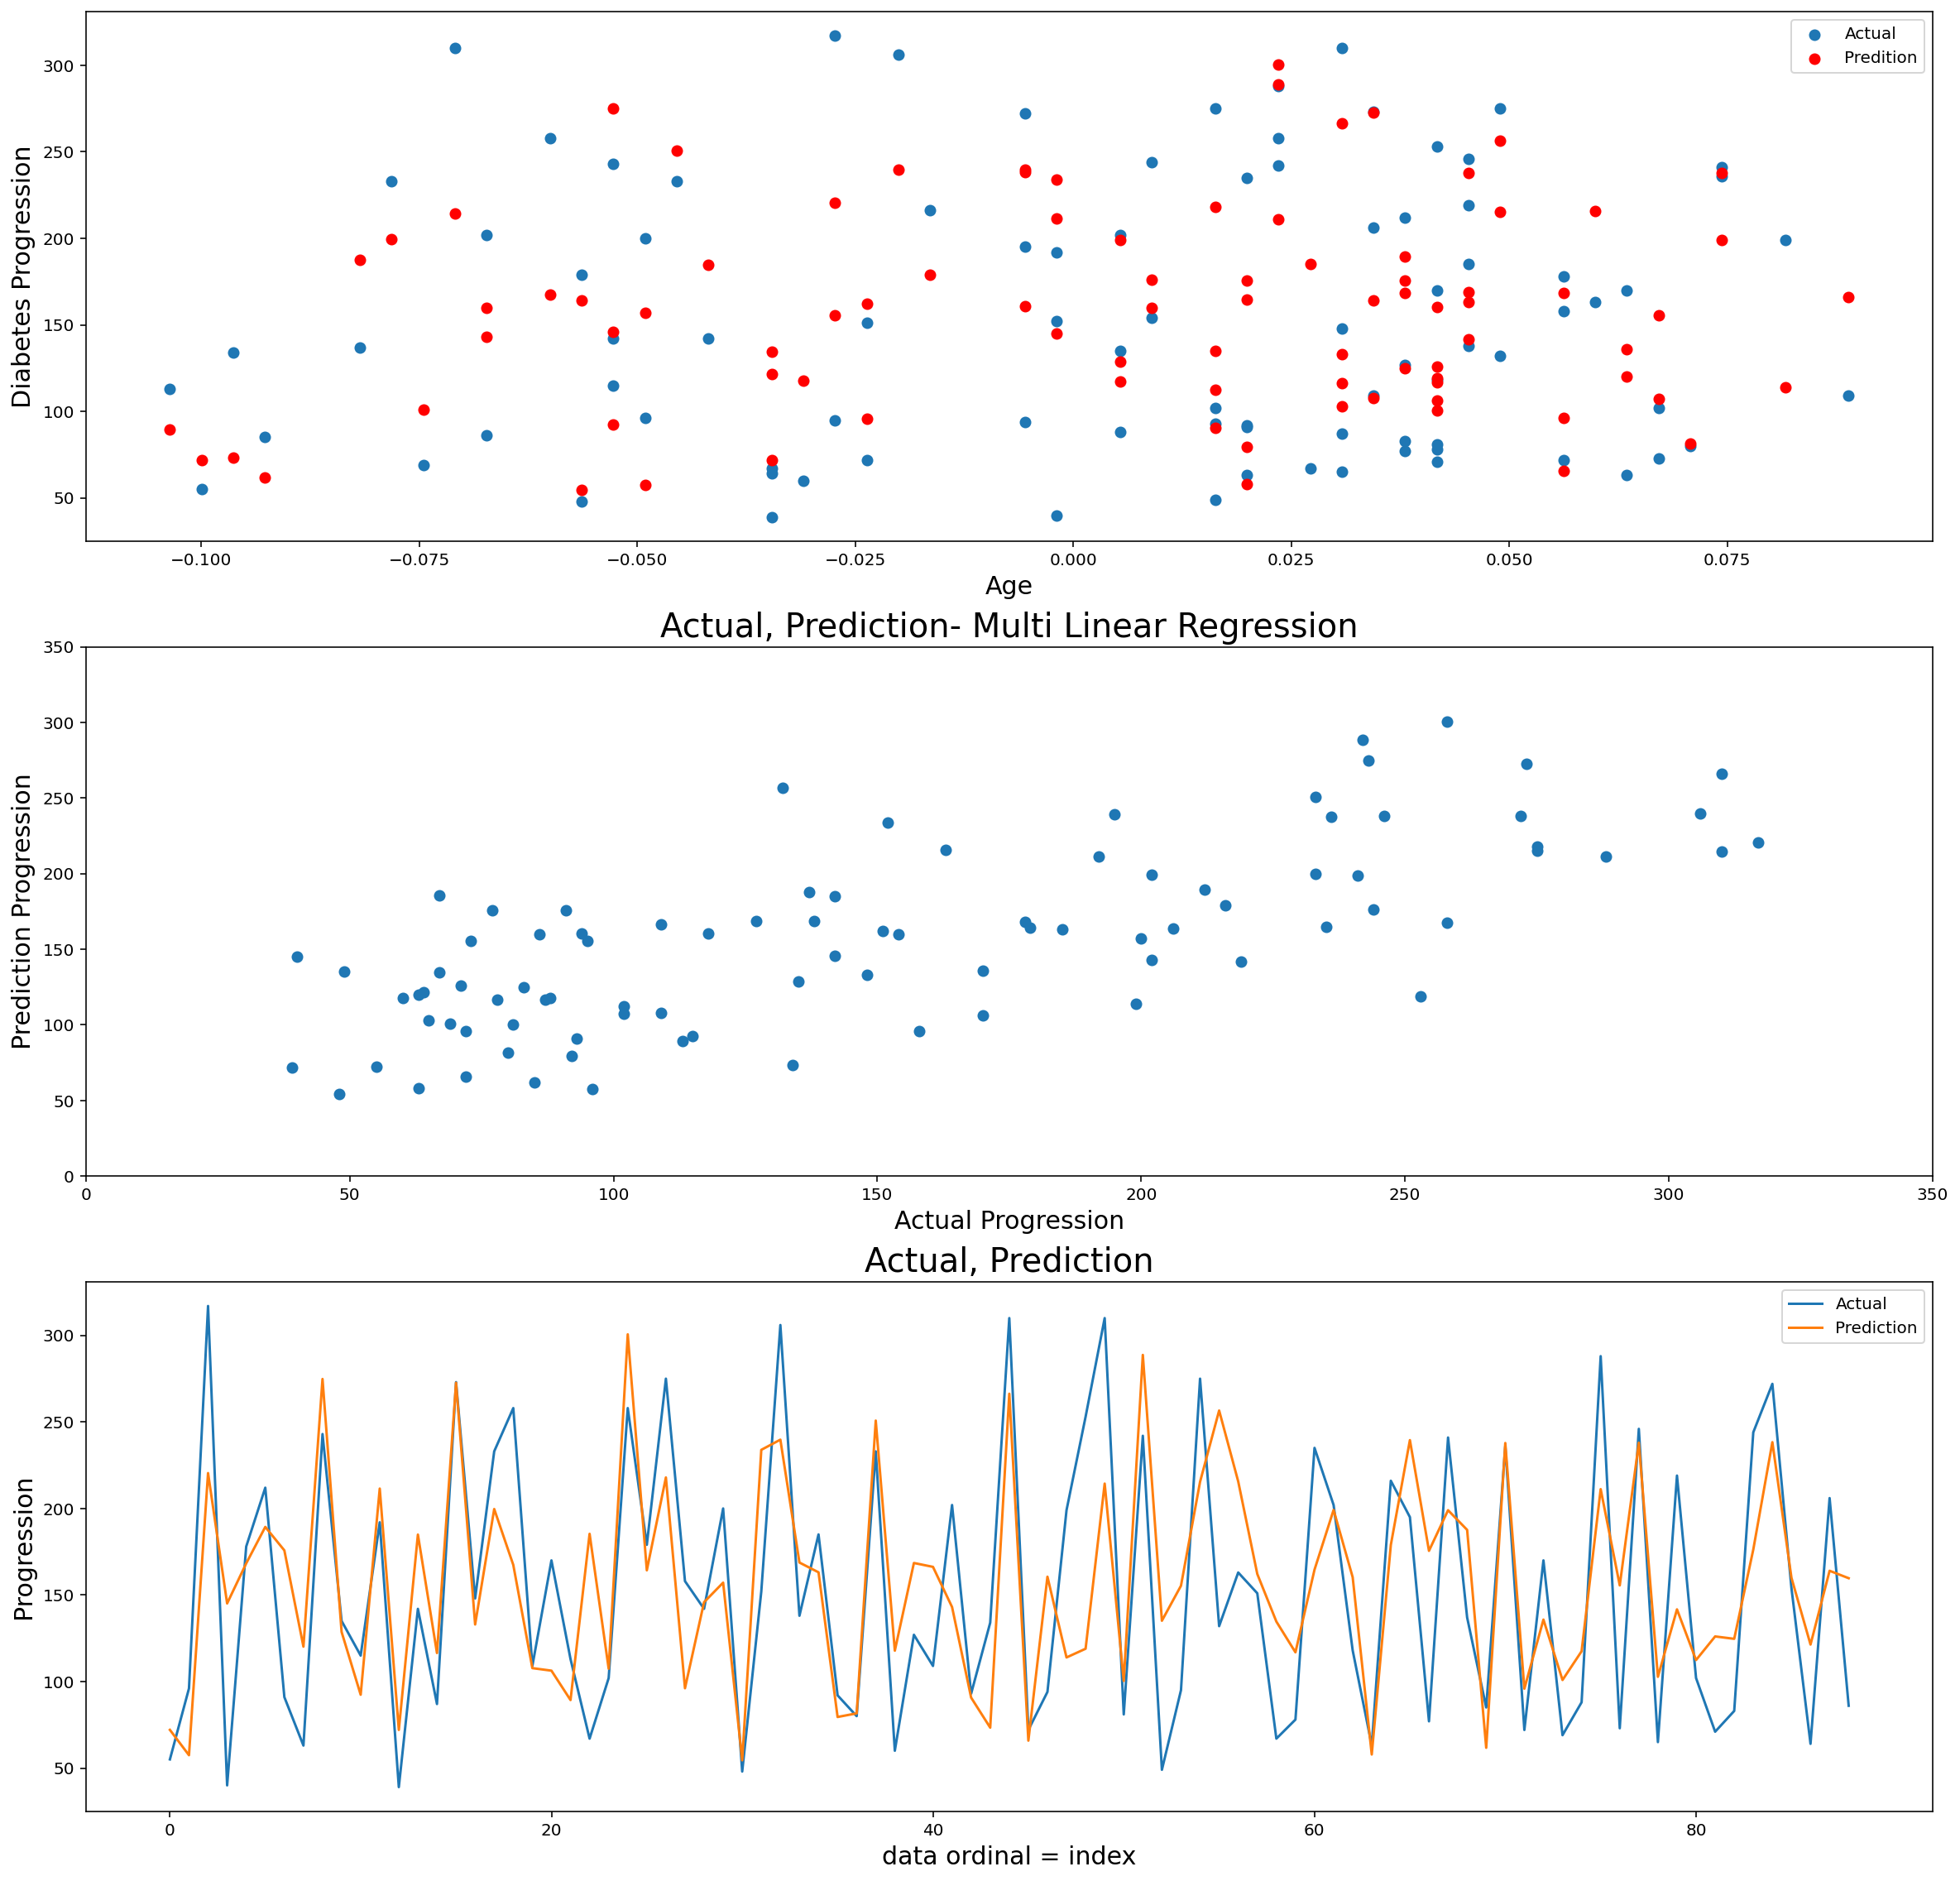

In [97]:
# 정답 데이터와 예측 데이터 시각화

fig = plt.figure(figsize=(20, 20))

# 문제지와 정답지 대비 문제지와 예측값 그래프 
plt.subplot(311)                                                     # 1번째 인덱스에 그리기  
plt.scatter(X_test[:, 0], y_test, label='Actual')                    # 테스트 데이터셋의 나이를 x축으로 하고 테스트 정답지를 y축
plt.subplot(311)
plt.scatter(X_test[:, 0], y_pred, label='Predition', c='r')          # 테스트 데이터셋의 나이를 x축으로 하고 모델 예측치를 y축
plt.xlabel("Age", size=15)
plt.ylabel("Diabetes Progression", size=15)
plt.legend()                                                         # 범례


# 실제값(정답지)와 예측값 비교
plt.subplot(312)                                                     # 2번째 인덱스에 그리기  
plt.scatter(y_test, y_pred)                                          # 실제값과 예측값이 거의 같다면 선형으로 그려져야 한다
plt.xlabel("Actual Progression", size=15)
plt.ylabel("Prediction Progression", size=15)
plt.title("Actual, Prediction- Multi Linear Regression", size=20)
plt.xlim(0, 350)
plt.ylim(0, 350)

# 실제값과 예측값을 plt.plot으로 그려보기
# 각 데이터의 실제값과 예측값이기 때문에 x축은 인덱스 번호
plt.subplot(313)                                                     # 3번째 인덱스에 그리기                                       
plt.plot(y_test, label='Actual')                                     # 실제값
plt.plot(y_pred, label='Prediction')                                 # 예측값
plt.xlabel("data ordinal = index", size=15)                          # 데이터 순서(순번), index
plt.ylabel("Progression", size=15)                                   # Target, 당뇨 진행에 대한 실제값
plt.title("Actual, Prediction", size=20)
plt.legend()


plt.show()

정답지와 분포도가 유사하여 잘 예측되었다

In [ ]:
'''
- 정량 평가의 경우 (e.g. acc 80% 이상)은 정확히 해당 지표를 맞추어야 합니다.
- 다음의 경우는 **미평가**가 될 수 있습니다.
    - **코드만 있고 결과물이 없는 경우**
        - **코드에 대한 설명이 없는 경우**
        - **회고가 없는 경우**
    - **깃헙 링크가 잘못되어 열람이 안되는 경우**
        - **(중요) 링크를 제출하기 전에 해당 링크에서 프로젝트가 잘 열리는지 꼭 확인해주세요.**
        - 만약 프로젝트의 용량이 커서 프로젝트 로딩이 안된다면 **nbviewer 링크**를 제출해주세요.
'''

# 최종 결과 해석
## 어떤 모델이 가장 좋은 성능을 보이는가? 
선형 회귀 모델

## 모델 성능 평가 지표로 무엇으로 설정하겠는가?
손실함수 RME로 하였고 학습률 1로 했을 때는 수렴이 아닌 발산하였습니다. 그래서 학습률을 1보다 작은 수로 했을 때 값이 수렴함을 확인하고 조금 더 미세하게 학습시키도록 0.001로 선정했습니다

## sklearn.metrics에서 제공하는 평가지표 선정하고 선택한 이유?
- 1번 프로젝트는 sklearn.metrics를 사용할 필요가 없었습니다
- 2번 프로젝트

# 8. 회고


1. 이번 프로젝트에서 어려웠던 점
   - 수식을 가져다가 사용하는 것이라면 어렵지 않았겠지만 미분을 왜하고 수식은 왜 그런지 이해하는데 어려움이 있었습니다. 
   - 그래프 그리려고 하는데 무엇을 x축으로 잡아야 하고 무엇을 y축으로 잡아야 할지 많은 고민을 했습니다.  
   문제 마지막에 각각 입력할 것을 알려줬었는데 만약 지시 내용이 없었다면 어떻게 해야할지 많은 시간을 투자해야했을 것 같습니다.
    
2. 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
    - 손실함수 미분해서 최적의 W, b을 찾는 것이 선형회귀 학습 모델이 학습하는 대상이었다는 것을 알게 되었습니다
    - 그래프를 산점도로 그려봤는데 학습률과 시행횟수를 늘리고 줄이고 해봐도 선 모양으로 나타나지 않는데 이게 맞는 것인지 모르겠습니다
    
3. 루브릭 평가 지표를 맞추기 위해 시도한 것들  
   -  MSE 손실함수값 2870으로 수렴했습니다  
   -  각 프로젝트마다 시각화를 하였습니다  
    
4. 만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정  
    - 달성함
    
5. 자기 다짐
    - 그래프 그리는 연습이 필요하다
    
